# Digits classification Dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 6s 1us/step


In [4]:
len(X_train), len(X_test)

(60000, 10000)

In [6]:
X_train[0].shape

(28, 28)

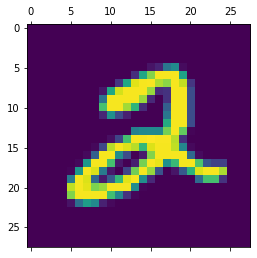

In [11]:
plt.matshow(X_train[5])

In [12]:
y_train[5]

2

In [14]:
X_train.shape

(60000, 28, 28)

In [18]:
# Flattening the data into 1D array
X_train_flatten = X_train.reshape(len(X_train), 28 * 28)
X_test_flatten = X_test.reshape(len(X_test), 28 * 28)

X_train_flatten.shape, X_test_flatten.shape

((60000, 784), (10000, 784))

In [21]:
# Create the model
model = tf.keras.Sequential([
tf.keras.layers.Dense(10, input_shape=(784,), activation=tf.keras.activations.sigmoid)
])


# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


# Fit the model
model.fit(X_train_flatten, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.8283 - accuracy: 0.8386
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 6.0800 - accuracy: 0.8788
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 5.6148 - accuracy: 0.8827
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 5.5160 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.3435 - accuracy: 0.8862


In [27]:
# Let's improve the model by scaling it
X_train_scale = X_train_flatten/255
X_test_scale = X_test_flatten/255

In [28]:
X_train_scale[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [29]:
# Flattening the data into 1D array
X_train_scale_flatten = X_train_scale.reshape(len(X_train), 28 * 28)
X_test_scale_flatten = X_test_scale.reshape(len(X_test), 28 * 28)

X_train_scale_flatten.shape, X_test_scale_flatten.shape

((60000, 784), (10000, 784))

In [30]:
# Create the model
model_2 = tf.keras.Sequential([
tf.keras.layers.Dense(10, input_shape=(784,), activation=tf.keras.activations.sigmoid)
])


# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


# Fit the model
model_2.fit(X_train_scale_flatten, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4734 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3033 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2830 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2728 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.9261


### The accuracy is improved from 88% to 92% by scaling data

In [31]:
# Evaluate the model
model_2.evaluate(X_test_scale_flatten, y_test)

313/313 [==============================] - 2s 2ms/step - loss: 0.2703 - accuracy: 0.9257


[0.27031412720680237, 0.9257000088691711]

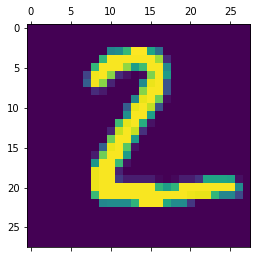

In [40]:
# Lets predict the values
plt.matshow(X_test[1])

In [43]:
y_pred = model_2.predict(X_test_scale_flatten)
y_pred[1]

array([3.8266295e-01, 5.3906441e-03, 9.9957222e-01, 4.1014922e-01,
       5.0483490e-10, 8.2001472e-01, 9.3522066e-01, 6.6312748e-13,
       1.5976465e-01, 2.7282629e-09], dtype=float32)

In [44]:
np.argmax(y_pred[1])

2

In [46]:
# Create the model and add hidden layer
model_3 = tf.keras.Sequential([
tf.keras.layers.Dense(100, input_shape=(784,), activation=tf.keras.activations.relu),
tf.keras.layers.Dense(10, activation=tf.keras.activations.sigmoid)

])


# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


# Fit the model
model_3.fit(X_train_scale_flatten, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2788 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1275 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0670 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0523 - accuracy: 0.9844


In [47]:
# Evaluate the model
model_3.evaluate(X_test_scale_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9754


[0.08172544091939926, 0.9753999710083008]